import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Telecom Customer Churn.csv")
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   customerID        1000 non-null   object 
 2   gender            1000 non-null   object 
 3   SeniorCitizen     1000 non-null   int64  
 4   Partner           1000 non-null   object 
 5   Dependents        1000 non-null   object 
 6   tenure            1000 non-null   int64  
 7   PhoneService      1000 non-null   object 
 8   MultipleLines     1000 non-null   object 
 9   InternetService   1000 non-null   object 
 10  OnlineSecurity    1000 non-null   object 
 11  OnlineBackup      1000 non-null   object 
 12  DeviceProtection  1000 non-null   object 
 13  TechSupport       1000 non-null   object 
 14  StreamingTV       1000 non-null   object 
 15  StreamingMovies   1000 non-null   object 
 16  Contract          1000 non-null   object 
 

**Data Cleaning**

In [ ]:
# force convert object to float64 (numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors= 'coerce')
# Checking missing values we have
df['TotalCharges'].isnull().sum()
#Drop the NaN values
df.dropna(inplace=True)

In [ ]:
df.sample(10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
937,937,6400-BWQKW,Female,0,No,No,6,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.05,434.50,1
192,192,2984-RGEYA,Female,0,Yes,Yes,69,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.75,1375.40,0
278,278,8645-KWHJO,Male,0,No,No,14,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,55.00,771.95,0
230,230,2651-ZCBXV,Male,0,No,No,54,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.00,5760.65,0
424,424,8111-BKVDS,Female,0,No,No,10,No,No phone service,DSL,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),40.70,449.30,0
469,469,4640-UHDOS,Female,0,Yes,Yes,13,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,No,Electronic check,55.95,734.35,1
624,624,1009-IRMNA,Female,0,No,No,7,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.00,137.60,1
253,253,3282-ZISZV,Male,0,No,Yes,32,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),83.70,2633.30,0
771,771,0236-HFWSV,Male,0,No,No,15,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.35,1444.65,1
131,131,6207-WIOLX,Female,0,Yes,Yes,25,No,No phone service,DSL,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,1


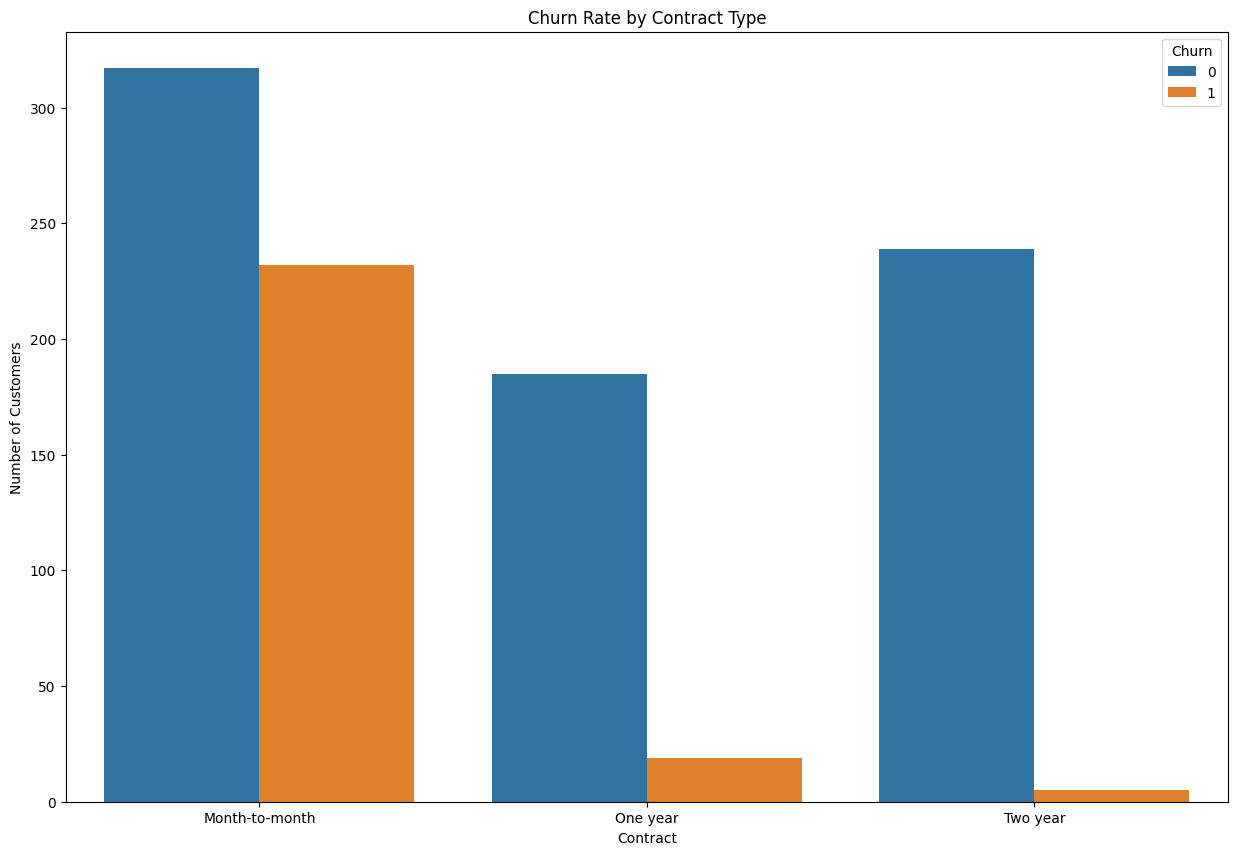

In [ ]:
plt.figure(figsize=(15,10))
#Create count plot
sns.countplot(x='Contract' , hue='Churn', data=df)
# Add title
plt.title('Churn Rate by Contract Type')
plt.ylabel('Number of Customers')
plt.show()

**Do loyal customers (people who have been here 50+ months) leave, or is it mostly new people?**

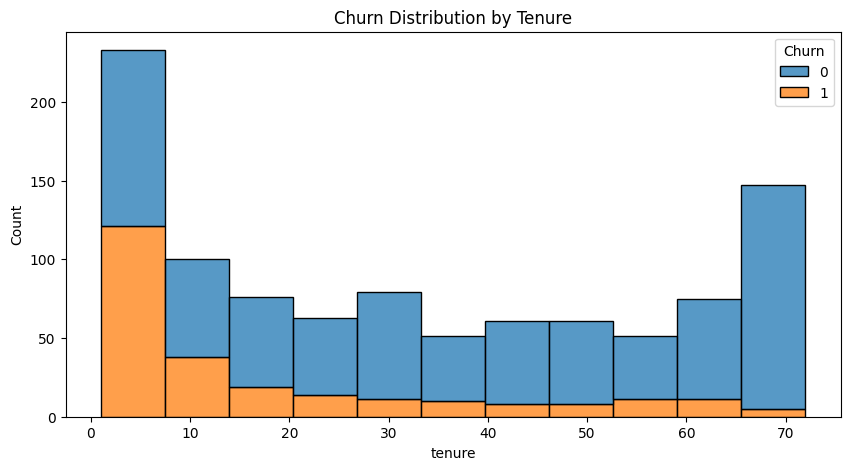

In [ ]:
# create histogram
plt.figure(figsize =(10,5))

sns.histplot(x='tenure' , hue='Ch urn', data=df , multiple='stack')
plt.title('Churn Distribution by Tenure')
plt.show()


**Are people leaving because we are charging them too much?**

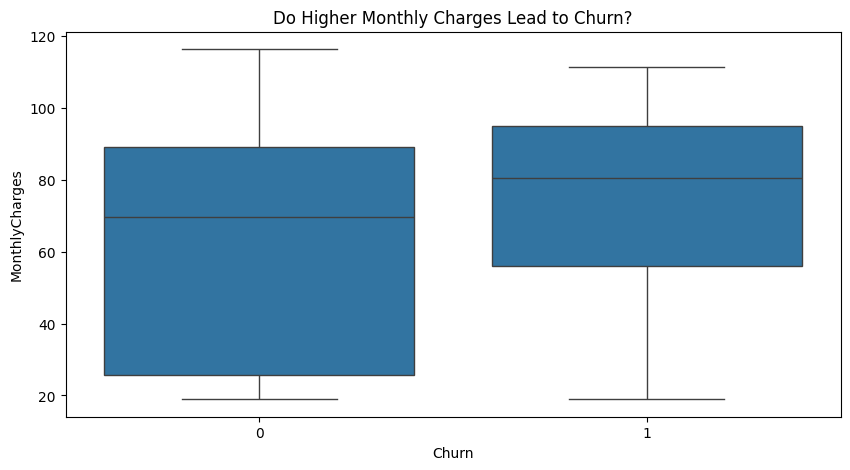

In [ ]:
plt.figure(figsize=(10,5))

sns.boxplot(x='Churn' , y='MonthlyCharges' , data=df)
plt.title('Do Higher Monthly Charges Lead to Churn?')
plt.show()